In [218]:
#IMPORT THE PACKAGES 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [219]:
dataset= pd.read_csv("C:\\Users\\UCiK\\OneDrive\\Desktop\\ds course\\datasets\\claimants.csv")

In [220]:
dataset

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [221]:
dataset.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [229]:
dataset["CLMAGE"]= dataset["CLMAGE"].fillna(dataset["CLMAGE"].mean())


In [160]:
print(dataset["CLMSEX"].value_counts())
print(dataset["CLMINSUR"].value_counts())
print(dataset["SEATBELT"].value_counts())

1.0    742
0.0    586
Name: CLMSEX, dtype: int64
1.0    1179
0.0     120
Name: CLMINSUR, dtype: int64
0.0    1270
1.0      22
Name: SEATBELT, dtype: int64


In [222]:
dataset["CLMSEX"]=dataset["CLMSEX"].fillna(dataset["CLMSEX"].mode()[0])

In [223]:
dataset["CLMINSUR"]=dataset["CLMINSUR"].fillna(dataset["CLMINSUR"].mode()[0])
dataset["SEATBELT"]=dataset["SEATBELT"].fillna(dataset["SEATBELT"].mode()[0])

In [224]:
dataset = dataset.drop('CASENUM' , axis=1)

In [164]:
dataset

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.000000,34.940
1,1,1.0,0.0,0.0,18.000000,0.891
2,1,0.0,1.0,0.0,5.000000,0.330
3,0,0.0,1.0,1.0,31.000000,0.037
4,1,0.0,1.0,0.0,30.000000,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,28.414422,0.576
1336,0,1.0,1.0,0.0,46.000000,3.705
1337,1,1.0,1.0,0.0,39.000000,0.099
1338,0,1.0,0.0,0.0,8.000000,3.177


In [12]:
import statsmodels.formula.api as sm
model=sm.logit("ATTORNEY~CLMSEX+CLMSEX+SEATBELT+CLMAGE+LOSS" ,data = dataset).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.611539
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ATTORNEY   No. Observations:                 1340
Model:                          Logit   Df Residuals:                     1335
Method:                           MLE   Df Model:                            4
Date:                Sat, 19 Jun 2021   Pseudo R-squ.:                  0.1174
Time:                        09:41:38   Log-Likelihood:                -819.46
converged:                       True   LL-Null:                       -928.48
Covariance Type:            nonrobust   LLR p-value:                 4.957e-46
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3092      0.133      2.326      0.020       0.049       0.570
CLMSEX         0.3399      0.119      2.849      0.004       0.106       0.574
SEATBELT      -0.6480      0.521     -1.244      0.214      -1.669       0.373
CLMAGE         0.0070      0.003      2.203      0.028       0.001       0.013
LOSS          -0.3233      0.029    -10.987      0.000      -0.381      -0.266
==============================================================================
"""

In [13]:
model.params

Intercept    0.309237
CLMSEX       0.339902
SEATBELT    -0.648021
CLMAGE       0.007002
LOSS        -0.323343
dtype: float64

In [14]:
np.exp(model.params)

Intercept    1.362385
CLMSEX       1.404810
SEATBELT     0.523080
CLMAGE       1.007027
LOSS         0.723726
dtype: float64

In [17]:
pred= model.predict(pd.DataFrame(dataset[["CLMSEX","SEATBELT","CLMAGE","LOSS"]]))

In [18]:
pred

0       0.000024
1       0.619418
2       0.559108
3       0.466629
4       0.624106
          ...   
1335    0.579800
1336    0.443554
1337    0.708933
1338    0.420163
1339    0.654016
Length: 1340, dtype: float64

In [20]:
from sklearn.metrics import accuracy_score

score = accuracy_score(dataset["ATTORNEY"],pred>0.5)

In [21]:
score

0.7044776119402985

# model 2 

In [132]:
dataset

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [235]:
#check the missing values

dataset.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

C:\Users\UCiK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CLMAGE'>

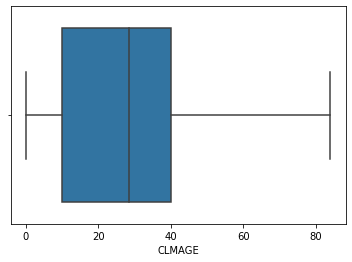

In [169]:
sns.boxplot(dataset["CLMAGE"])

C:\Users\UCiK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LOSS'>

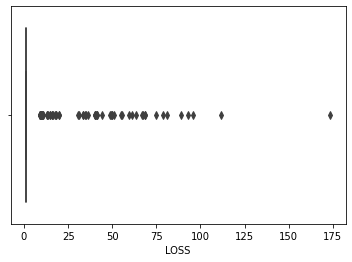

In [174]:
sns.boxplot(dataset["LOSS"])

In [175]:
q1=dataset.quantile(0.25)
q3=dataset.quantile(0.75)
iqr=q3-q1
low=q1-(1.5*iqr)
high=q3+(1.5*iqr)
dataset["CLMAGE"]=np.where(dataset["CLMAGE"]<low.CLMAGE,dataset["CLMAGE"].mean(),dataset["CLMAGE"])
dataset["CLMAGE"]=np.where(dataset["CLMAGE"]>high.CLMAGE,dataset["CLMAGE"].mean(),dataset["CLMAGE"])
dataset["LOSS"]=np.where(dataset["LOSS"]<low.LOSS,dataset["LOSS"].median(),dataset["LOSS"])
dataset["LOSS"]=np.where(dataset["LOSS"]<high.LOSS,dataset["LOSS"].median(),dataset["LOSS"])


In [138]:
#we didnt remove outliers in the loss column data
#remove tha column


True     1010
False     330
Name: LOSS, dtype: int64

In [176]:
del dataset["LOSS"]

In [230]:
dataset

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.000000,34.940
1,1,1.0,0.0,0.0,18.000000,0.891
2,1,0.0,1.0,0.0,5.000000,0.330
3,0,0.0,1.0,1.0,31.000000,0.037
4,1,0.0,1.0,0.0,30.000000,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,28.414422,0.576
1336,0,1.0,1.0,0.0,46.000000,3.705
1337,1,1.0,1.0,0.0,39.000000,0.099
1338,0,1.0,0.0,0.0,8.000000,3.177


In [231]:
#spilt the data x and y 

x=dataset.iloc[:,1:]
y=dataset.iloc[:,0]

In [232]:
print(x)
y

      CLMSEX  CLMINSUR  SEATBELT     CLMAGE    LOSS
0        0.0       1.0       0.0  50.000000  34.940
1        1.0       0.0       0.0  18.000000   0.891
2        0.0       1.0       0.0   5.000000   0.330
3        0.0       1.0       1.0  31.000000   0.037
4        0.0       1.0       0.0  30.000000   0.038
...      ...       ...       ...        ...     ...
1335     0.0       1.0       0.0  28.414422   0.576
1336     1.0       1.0       0.0  46.000000   3.705
1337     1.0       1.0       0.0  39.000000   0.099
1338     1.0       0.0       0.0   8.000000   3.177
1339     1.0       1.0       0.0  30.000000   0.688

[1340 rows x 5 columns]


0       0
1       1
2       1
3       0
4       1
       ..
1335    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1340, dtype: int64

In [236]:
from sklearn.preprocessing import MinMaxScaler
nor = MinMaxScaler()
x=nor.fit_transform(x)

In [233]:
x

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.000000,34.940
1,1.0,0.0,0.0,18.000000,0.891
2,0.0,1.0,0.0,5.000000,0.330
3,0.0,1.0,1.0,31.000000,0.037
4,0.0,1.0,0.0,30.000000,0.038
...,...,...,...,...,...
1335,0.0,1.0,0.0,28.414422,0.576
1336,1.0,1.0,0.0,46.000000,3.705
1337,1.0,1.0,0.0,39.000000,0.099
1338,1.0,0.0,0.0,8.000000,3.177


# CREATE AN ALGORITHM

In [227]:
from sklearn.model_selection import train_test_split

X_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=.25, random_state=0)

In [238]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [188]:
y_predict=classifier.predict(x_test)

In [189]:
y_predict

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,

In [191]:
from sklearn.metrics import accuracy_score

score1 = accuracy_score(y_test,y_predict)
score1


0.5402985074626866